# Homework Part a
**Goal:** *Load the dataset in an iPython notebook [2 points]*

*Use the accompanied dataset for this homework. Read the dataset description below carefully and make sure you understand the dataset features and values.
Dataset description: This dataset is composed of a range of biomedical voice measurements from patients with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.*

*The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording; the name of the patient is identified in the first column.*

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Get csv file and upload it
raw_data = pd.read_csv('data.csv')
raw_data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775,1
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756,1
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755,1
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571,1
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362,1


# Homework Part b
**Goal:** *Split the dataset for training a knn classifier in a holdout + cross-validation fashion. Run the k-nn (k-nearest neighbors) algorithm on this dataset and find the optimal k using Grid search, where k={4, 5, 6, 7, 8, 9, 10} (Hint: use the GridSearchCV operator in sklearn).[10 points]*

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split


In [4]:
# set up values and label
X_voice = raw_data.iloc[:, 1:23].values
Y_voice = raw_data.iloc[:,-1].values  # last column of the data frame raw_data

In [5]:
# Make training and test data
X_train, X_test, y_train, y_test = \
    train_test_split(X_voice,
                     Y_voice,
                     test_size=0.20,
                     stratify=Y_voice,
                     random_state=1)

In [6]:
# Make a pipeline
pipe = make_pipeline(StandardScaler(),
                     PCA(n_components=2),
                     KNeighborsClassifier())

In [7]:
# Performing Grid Search
param_range = list(range(4,11))
param_grid = [{'kneighborsclassifier__n_neighbors' : param_range}]

grid = GridSearchCV(estimator=pipe, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)

gs = grid.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8846153846153846
{'kneighborsclassifier__n_neighbors': 5}


In [8]:
from sklearn.model_selection import StratifiedKFold
    
kfold = StratifiedKFold(n_splits=10,
                        random_state=1).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe.fit(X_train[train], y_train[train])
    score = pipe.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [ 34 106], Acc: 0.938
Fold:  2, Class dist.: [ 34 106], Acc: 0.938
Fold:  3, Class dist.: [ 34 106], Acc: 0.938
Fold:  4, Class dist.: [ 34 106], Acc: 0.750
Fold:  5, Class dist.: [ 34 106], Acc: 0.875
Fold:  6, Class dist.: [ 34 106], Acc: 0.938
Fold:  7, Class dist.: [ 34 106], Acc: 0.938
Fold:  8, Class dist.: [ 34 106], Acc: 0.875
Fold:  9, Class dist.: [ 35 107], Acc: 0.786
Fold: 10, Class dist.: [ 35 107], Acc: 0.857

CV accuracy: 0.883 +/- 0.065


# Homework Part c
**Goal:** *Plot the learning curve, as well as the validation curve [6 points].*

In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes,
         train_mean,
         color='blue',
         marker='o',
         markersize=5,
         label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15,
                 color='blue')

plt.plot(train_sizes,
         test_mean,
         color='green',
         linestyle='--',
         marker='s',
         markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15,
                 color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 1 Axes>

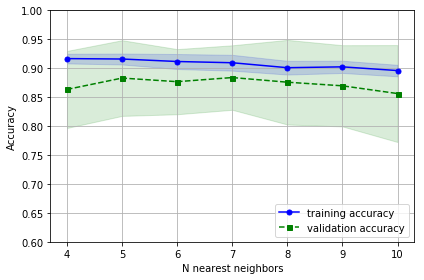

In [10]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(
                estimator=pipe, 
                X=X_train, 
                y=y_train, 
                param_name='kneighborsclassifier__n_neighbors', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range,
         train_mean, 
         color='blue',
         marker='o', 
         markersize=5,
         label='training accuracy')

plt.fill_between(param_range,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15,
                 color='blue')

plt.plot(param_range,
         test_mean, 
         color='green',
         linestyle='--', 
         marker='s',
         markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15,
                 color='green')

plt.grid()
plt.legend(loc='lower right')
plt.xlabel('N nearest neighbors')
plt.ylabel('Accuracy')
plt.ylim([0.6, 1.0])
plt.tight_layout()
plt.show()

# Homework Part d
**Goal:** *Create a GitHub repository and share your code via GitHub with the instructor by submitting the link on Canvas [2 points].*

Code found at: 